# linear model 

In [8]:
import mglearn

w[0]: 0.393906  b: -0.031804


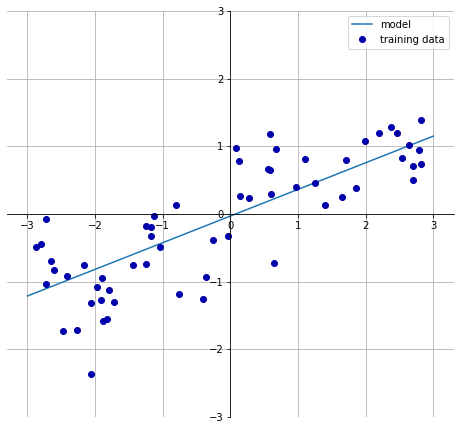

In [9]:
mglearn.plots.plot_linear_regression_wave()

## ordinary least squares

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X,y = mglearn.datasets.make_wave(n_samples=60)

In [12]:
Xtrain, Xtest, ytrain,ytest = train_test_split(X,y, random_state=42)

In [13]:
lr = LinearRegression().fit(Xtrain, ytrain)

In [14]:
print(f'incercept: {lr.intercept_}')
print(f'coef: {lr.coef_}')

incercept: -0.031804343026759746
coef: [0.39390555]


In [15]:
print(f'train set score: {lr.score(Xtrain,ytrain)}')
print(f'test set score: {lr.score(Xtest, ytest)}')

train set score: 0.6700890315075756
test set score: 0.65933685968637


In [16]:
X2,y2= mglearn.datasets.load_extended_boston()

In [17]:
Xtrain1, Xtest1, ytrain1, ytest1= train_test_split(X2,y2)

In [18]:
lr2 = LinearRegression().fit(Xtrain1,ytrain1)

In [19]:
print(f'train set score: {lr2.score(Xtrain1, ytrain1)}')
print(f'test set score: {lr2.score(Xtest1, ytest1)}')

train set score: 0.9504241324303478
test set score: 0.7841780826076623


# Ridge regression

In [20]:
from sklearn.linear_model import Ridge
from matplotlib import pyplot as plt

In [21]:
ridge = Ridge().fit(Xtrain1, ytrain1)

In [22]:
print(f'train set score:{ridge.score(Xtrain1, ytrain1)}')
print(f'test set score:{ridge.score(Xtest1, ytest1)}')

train set score:0.881196739728306
test set score:0.7419610743463365


In [23]:
ridge10 = Ridge(alpha=10).fit(Xtrain1,ytrain1)

In [24]:
print(f'train set score: {ridge10.score(Xtrain1,ytrain1)}')
print(f'test set score:{ridge10.score(Xtest1, ytest1)}')

train set score: 0.7887022501431565
test set score:0.6391020918261012


In [25]:
ridge01 = Ridge(alpha=0.1).fit(Xtrain1,ytrain1)

In [26]:
print(f'train set score: {ridge01.score(Xtrain1,ytrain1)}')
print(f'test set score:{ridge01.score(Xtest1, ytest1)}')

train set score: 0.9243309661098909
test set score:0.7911326454310519


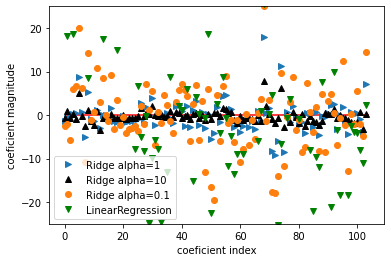

In [27]:
plt.plot(ridge.coef_, '>', label='Ridge alpha=1')
plt.plot(ridge10.coef_, '^k', label='Ridge alpha=10')
plt.plot(ridge01.coef_, 'o', label='Ridge alpha=0.1')
plt.plot(lr2.coef_, 'vg', label='LinearRegression')
plt.ylim(-25, 25)
plt.xlabel('coeficient index')
plt.ylabel('coeficient magnitude')
plt.hlines(0,0, len(lr2.coef_),'r')
plt.legend();

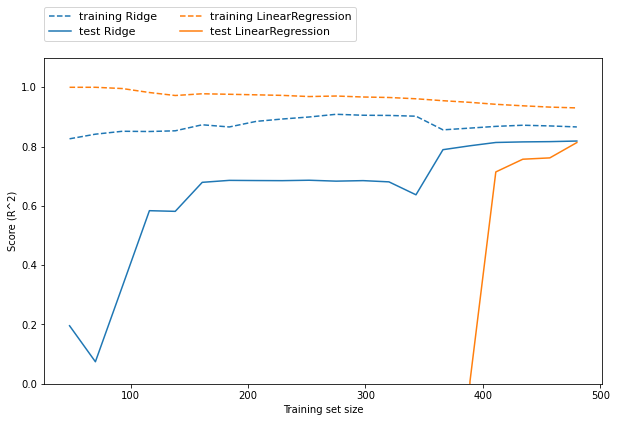

In [28]:
mglearn.plots.plot_ridge_n_samples()
fig = plt.gcf()
fig.set_size_inches(10,6) # prevent overfitting

# Lasso

In [29]:
from sklearn.linear_model import Lasso
import numpy as np

In [30]:
lasso = Lasso().fit(Xtrain1, ytrain1)

In [31]:
print(f'train set score: {lasso.score(Xtrain1, ytrain1)}')
print(f'test set score: {lasso.score(Xtest1, ytest1)}')
print(f'number of features used: {np.sum(lasso.coef_!=0)}')

train set score: 0.26013267544448404
test set score: 0.2127162023303788
number of features used: 5


In [32]:
lasso001 = Lasso(alpha=0.001, max_iter=100000).fit(Xtrain1, ytrain1)

In [33]:
print(f'train set score: {lasso001.score(Xtrain1, ytrain1)}')
print(f'test set score: {lasso001.score(Xtest1, ytest1)}')
print(f'number of features used: {np.sum(lasso001.coef_!=0)}')

train set score: 0.9404870783700207
test set score: 0.7946809919746967
number of features used: 72


In [34]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(Xtrain1, ytrain1)

In [35]:
print(f'train set score: {lasso00001.score(Xtrain1, ytrain1)}')
print(f'test set score: {lasso00001.score(Xtest1, ytest1)}')
print(f'number of features used: {np.sum(lasso00001.coef_!=0)}')

train set score: 0.9493145277082288
test set score: 0.7850558923712443
number of features used: 91


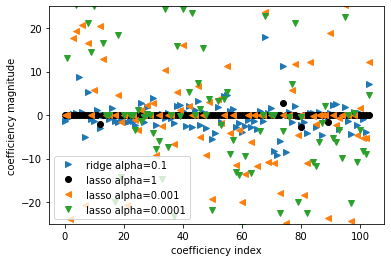

In [36]:
plt.plot(ridge.coef_, '>', label='ridge alpha=0.1')
plt.plot(lasso.coef_,'ok', label='lasso alpha=1')
plt.plot(lasso001.coef_,'<', label='lasso alpha=0.001')
plt.plot(lasso00001.coef_,'v', label='lasso alpha=0.0001')
plt.ylim(-25, 25)
plt.legend(loc='best')
plt.xlabel('coefficiency index')
plt.ylabel('coefficiency magnitude');

# Linear models for classification

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [63]:
log = LogisticRegression(C=1)

In [64]:
Xj, yj =mglearn.datasets.make_forge()

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)
/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


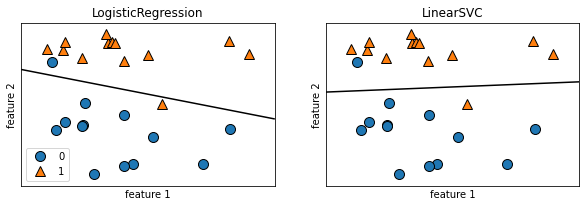

In [95]:
fig, axes = plt.subplots(1, 2, figsize=(10,3), subplot_kw = dict(xticks=[], yticks=[]))
Xj, yj =mglearn.datasets.make_forge()
for ax, model in zip(axes, [LogisticRegression(), LinearSVC()]):
    clf = model.fit(Xj,yj)
    mglearn.plots.plot_2d_separator(clf, Xj, eps=.5, fill=False, ax=ax)
    mglearn.discrete_scatter(Xj[:,0], Xj[:,1], yj, ax=ax)
    ax.set_xlabel('feature 1')
    ax.set_ylabel('feature 2')
    ax.set_title(f'{model.__class__.__name__}')
axes[0].legend();

In [66]:
from sklearn.datasets import load_breast_cancer

In [67]:
cancer=load_breast_cancer()

In [68]:
cancer.data.shape

(569, 30)

In [69]:
Xtrain0, Xtest0, ytrain0, ytest0 = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [70]:
logreg=LogisticRegression().fit(Xtrain0, ytrain0)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [71]:
print(f'train set score:{logreg.score(Xtrain0, ytrain0)}')
print(f'test set score:{logreg.score(Xtest0, ytest0)}')

train set score:0.9577464788732394
test set score:0.951048951048951


In [72]:
logreg1=LogisticRegression(C=100).fit(Xtrain0, ytrain0)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
print(f'train set score:{logreg1.score(Xtrain0, ytrain0)}')
print(f'test set score:{logreg1.score(Xtest0, ytest0)}')

train set score:0.9624413145539906
test set score:0.958041958041958


In [74]:
logreg2=LogisticRegression(C=0.001).fit(Xtrain0, ytrain0)

/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [75]:
print(f'train set score:{logreg2.score(Xtrain0, ytrain0)}')
print(f'test set score:{logreg2.score(Xtest0, ytest0)}')

train set score:0.9530516431924883
test set score:0.9440559440559441


In [76]:
logreg.coef_.shape

(1, 30)

In [77]:
logreg1.coef_.T.shape

(30, 1)

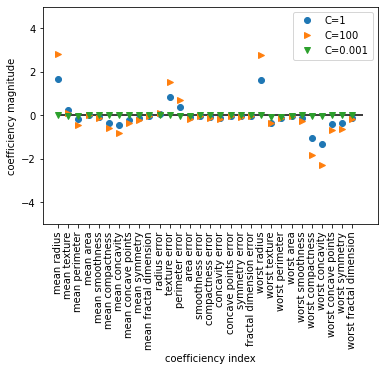

In [78]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg1.coef_.T,'>', label='C=100')
plt.plot(logreg2.coef_.T, 'v', label='C=0.001')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, cancer.data.shape[1],'k')
plt.ylim(-5,5)
plt.xlabel('coefficiency index')
plt.ylabel('coefficiency magnitude')
plt.legend();

C:0.001__train set score: 0.9131455399061033
C:0.001__test set score: 0.9230769230769231
C:1__train set score: 0.960093896713615
C:1__test set score: 0.958041958041958


/Users/david/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C:100__train set score: 0.9859154929577465
C:100__test set score: 0.9790209790209791


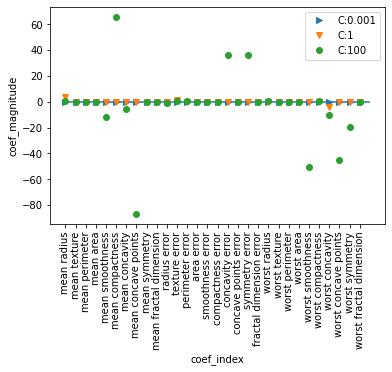

In [79]:
for C, marker in zip([0.001, 1, 100], ['>', 'v', 'o']):
    log = LogisticRegression(C=C, penalty="l1", solver='liblinear').fit(Xtrain0, ytrain0)
    print(f'C:{C}__train set score: {log.score(Xtrain0, ytrain0)}')
    print(f'C:{C}__test set score: {log.score(Xtest0, ytest0)}')
    plt.plot(log.coef_.T, marker, label=f'C:{C}')
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0,0, len(cancer.data.T))
plt.xlabel('coef_index')
plt.ylabel('coef_magnitude')
plt.legend(loc='best');

In [80]:
linear = LinearSVC(multi_class='ovr')

# Linear models for multiclass classification, for both LogisticRegression and LinearSVC, use one_verse_rest method ('ovr')

In [81]:
from sklearn.datasets import make_blobs

In [82]:
Xb, yb = make_blobs(random_state=42)

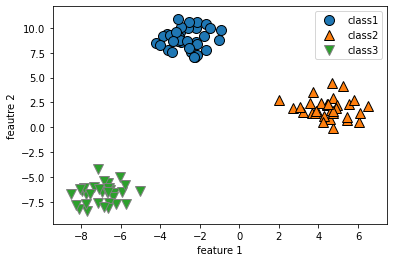

In [83]:
mglearn.discrete_scatter(Xb[:,0], Xb[:,1], yb);
plt.xlabel('feature 1')
plt.ylabel('feautre 2')
plt.legend(['class1', 'class2', 'class3']);

In [84]:
linear_svm = LinearSVC().fit(Xb,yb)

In [85]:
print(f'coefficiency shape: {linear_svm.coef_.shape}')
print(f'intercept shape: {linear_svm.intercept_.shape}')

coefficiency shape: (3, 2)
intercept shape: (3,)


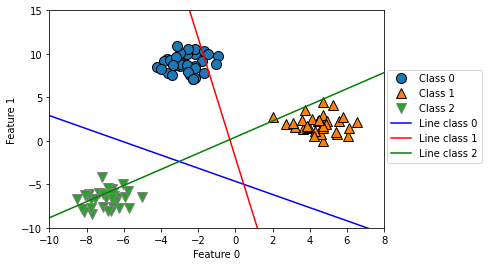

In [86]:
mglearn.discrete_scatter(Xb[:,0], Xb[:,1], yb);
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, (intercept+ coef[0]*line)/coef[1], c=color)
    plt.ylim(-10, 15) 
    plt.xlim(-10, 8) 
    plt.xlabel("Feature 0") 
    plt.ylabel("Feature 1") 
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

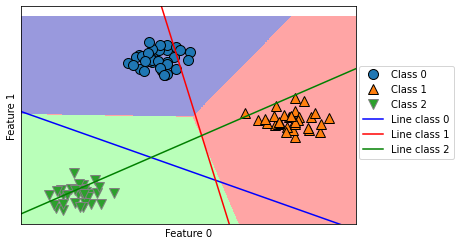

In [87]:
mglearn.plots.plot_2d_classification(linear_svm, Xb, alpha=0.4)
mglearn.discrete_scatter(Xb[:,0], Xb[:,1], yb);
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,['b', 'r', 'g']):
    plt.plot(line, (intercept+ coef[0]*line)/coef[1], c=color)
    plt.ylim(-10, 15) 
    plt.xlim(-10, 8) 
    plt.xlabel("Feature 0") 
    plt.ylabel("Feature 1") 
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1','Line class 2'], loc=(1.01, 0.3))

In [88]:
linear_svm.classes_

array([0, 1, 2])

In [92]:
linear_svm.coef_

array([[-0.17492582,  0.23139941],
       [ 0.47621353, -0.06937584],
       [-0.18914538, -0.20399631]])